<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/09%20compare_moex_etf.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Обзор индексных фондов российских акций 2021](https://rostsber.ru/publish/stocks/index_fund_review_2021.html) на блоге "Рост Сбережений"

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

Содержание:

- Сравнение ОПИФ на индекс Мосбиржи
- Сравнение БПИФ и ETF на индекс Мосбиржи

In [2]:
pif = ['MCFTR.INDX',
      '0295-74549871.PIF',
#       '0662-94119196.PIF', Alltek - Birzhevoy indeks aktsiy (Alltek)
#       '0695-94121916.PIF', Alʹfa–Kapital Indeks MosBirzhi (Alʹfa-Kapital)
      '0177-71671092.PIF',
#       '1149-94139555.PIF', Ingosstrah (стал активным фондом)
#       '0890-94127385.PIF', Otkrytiye – Indeks MosBirzhi (OTKRYTIYe)
#       '0983-94131725.PIF', Rayffayzen – Indeks MMVB golubykh fishek (Rayffayzen Kapital)
      '0351-76578546.PIF',
     ]

In [3]:
etf_full = [
    'MCFTR.INDX',
#     'FXRL.MOEX',
#     'RUSE.MOEX',
    'SBMX.MOEX',
    'VTBX.MOEX',
    'TMOS.MOEX',
#     'RCMX.MOEX', # Райффайзен - Индекс МосБиржи полной доходности 15
#     'OPNR.MOEX', # Открытие Индекс Мосбиржи 15
]

## Сравнение индексных фондов российских акций

In [4]:
x = ok.AssetList(pif, ccy='RUB', inflation=False)
x

assets           [MCFTR.INDX, 0295-74549871.PIF, 0177-71671092....
currency                                                       RUB
first_date                                                 2005-06
last_date                                                  2022-05
period_length                                   17 years, 0 months
inflation                                                     None
dtype: object

In [5]:
x.assets_first_dates

{'RUB': Timestamp('1992-08-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2003-03-01 00:00:00'),
 '0295-74549871.PIF': Timestamp('2005-04-01 00:00:00'),
 '0177-71671092.PIF': Timestamp('2005-04-01 00:00:00'),
 '0351-76578546.PIF': Timestamp('2005-06-01 00:00:00')}

In [6]:
x.names

{'MCFTR.INDX': 'MOEX Total Return',
 '0295-74549871.PIF': 'AK BARS Indeksnyy (AK BARS KAPITAL)',
 '0177-71671092.PIF': 'VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami)',
 '0351-76578546.PIF': 'Solid - Indeks MosBirzhi (SOLID Menedzhment)'}

In [7]:
lg1 = list(x.names.values())

In [8]:
lg1

['MOEX Total Return',
 'AK BARS Indeksnyy (AK BARS KAPITAL)',
 'VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami)',
 'Solid - Indeks MosBirzhi (SOLID Menedzhment)']

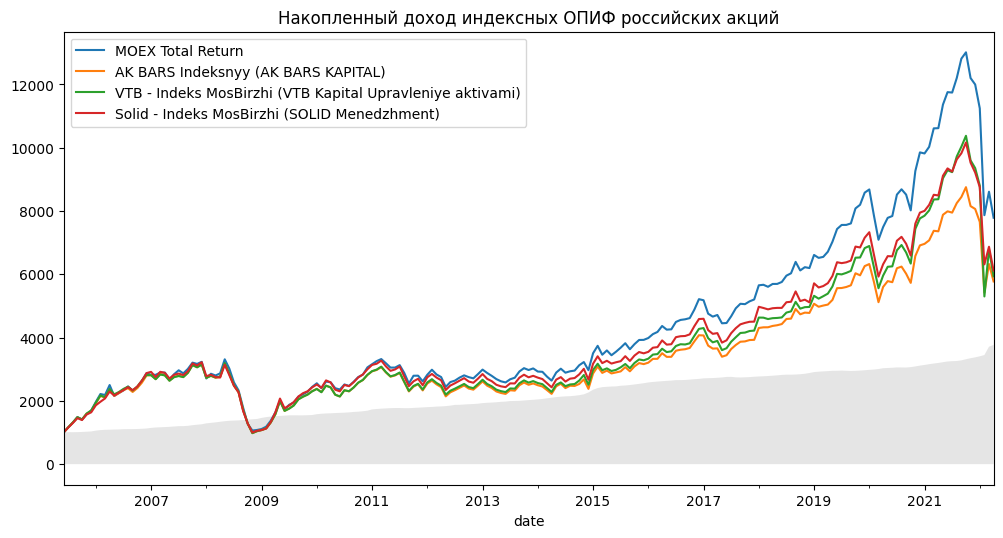

In [9]:
x.wealth_indexes.iloc[:, :-1].plot()
plt.fill_between(x.wealth_indexes.index.to_timestamp(), 0, x.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(lg1)
plt.title('Накопленный доход индексных ОПИФ российских акций');

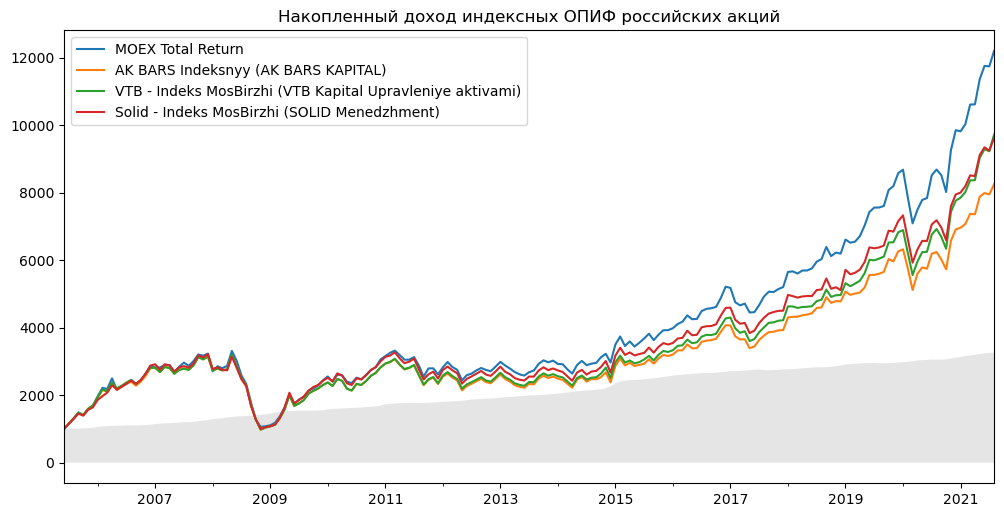

In [41]:
x.wealth_indexes.iloc[:, :-1].plot()
plt.fill_between(x.wealth_indexes.index.to_timestamp(), 0, x.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(lg1)
plt.title('Накопленный доход индексных ОПИФ российских акций');

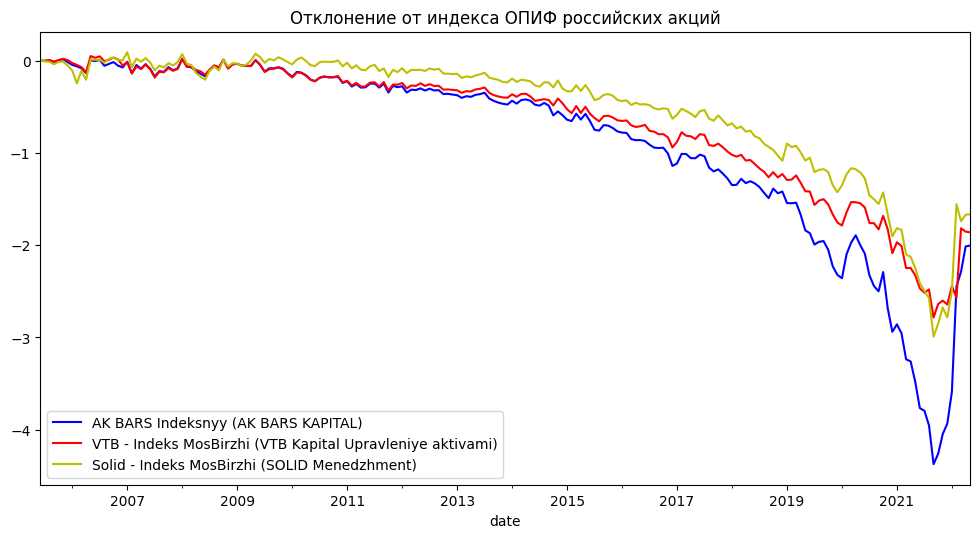

In [22]:
x.tracking_difference.plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Отклонение от индекса ОПИФ российских акций');

In [23]:
x.tracking_difference.tail(5)

,0295-74549871.PIF,0177-71671092.PIF,0351-76578546.PIF
date,,,
2022-01,-3.588588,-2.440700,-2.492511
2022-02,-2.446983,-2.569023,-1.555214
2022-03,-2.286266,-1.815952,-1.739754
2022-04,-2.013306,-1.852994,-1.668944
2022-05,-2.003007,-1.860451,-1.665272


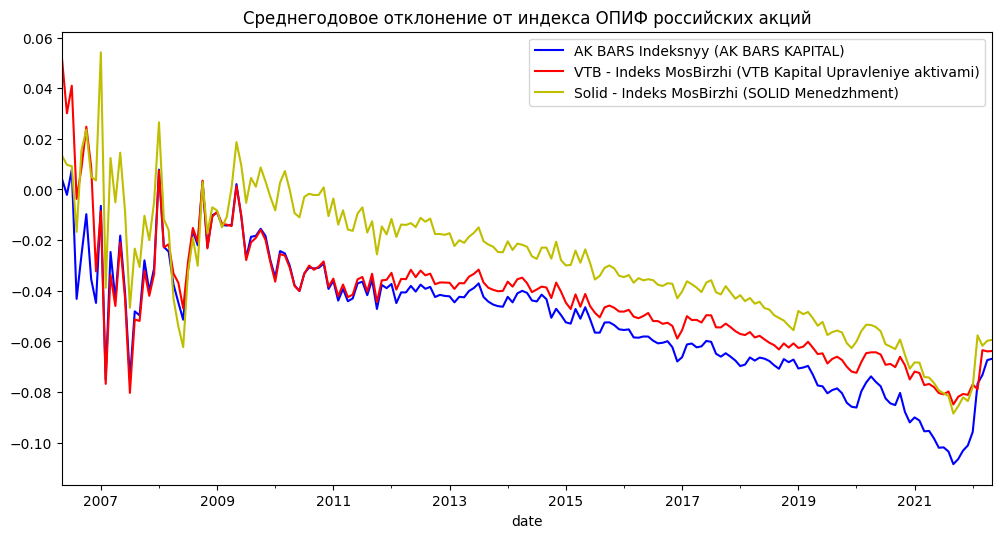

In [24]:
x.tracking_difference_annualized.plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Среднегодовое отклонение от индекса ОПИФ российских акций');

In [25]:
x.tracking_difference_annualized.iloc[-1, :]

0295-74549871.PIF   -0.066821
0177-71671092.PIF   -0.063773
0351-76578546.PIF   -0.059360
Name: 2022-05, dtype: float64

In [14]:
x5 = ok.AssetList(pif, ccy='RUB', first_date='2016-09')
x5

assets           [MCFTR.INDX, 0295-74549871.PIF, 0177-71671092....
currency                                                       RUB
first_date                                                 2016-09
last_date                                                  2022-04
period_length                                    5 years, 8 months
inflation                                                 RUB.INFL
dtype: object

In [15]:
x5.tracking_difference_annualized.iloc[-1, :]

0295-74549871.PIF   -0.018879
0177-71671092.PIF   -0.023814
0351-76578546.PIF   -0.031974
Name: 2022-04, dtype: float64

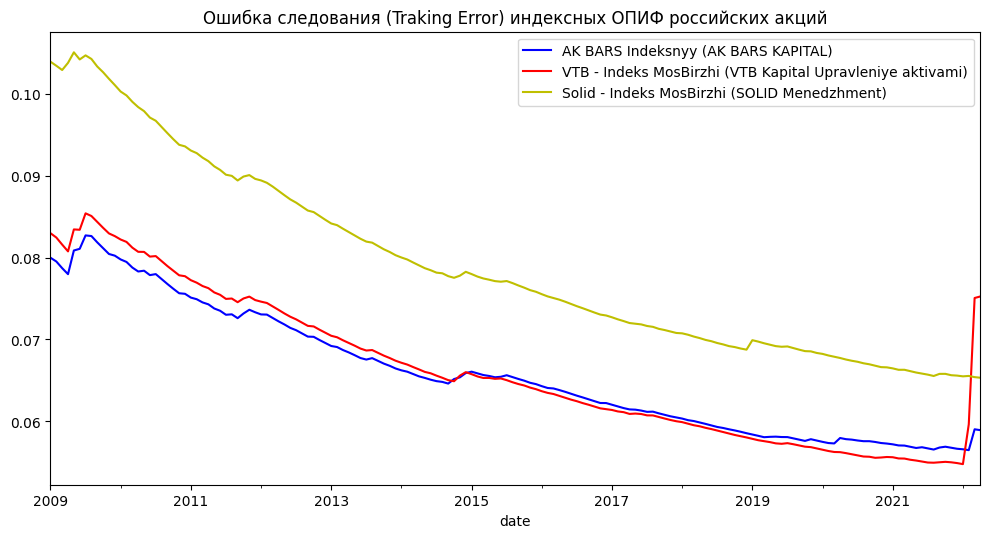

In [16]:
x.tracking_error['2009-01':].plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Ошибка следования (Traking Error) индексных ОПИФ российских акций');

In [26]:
x.tracking_error.iloc[-1, :]

0295-74549871.PIF    0.058774
0177-71671092.PIF    0.075067
0351-76578546.PIF    0.065161
Name: 2022-05, dtype: float64

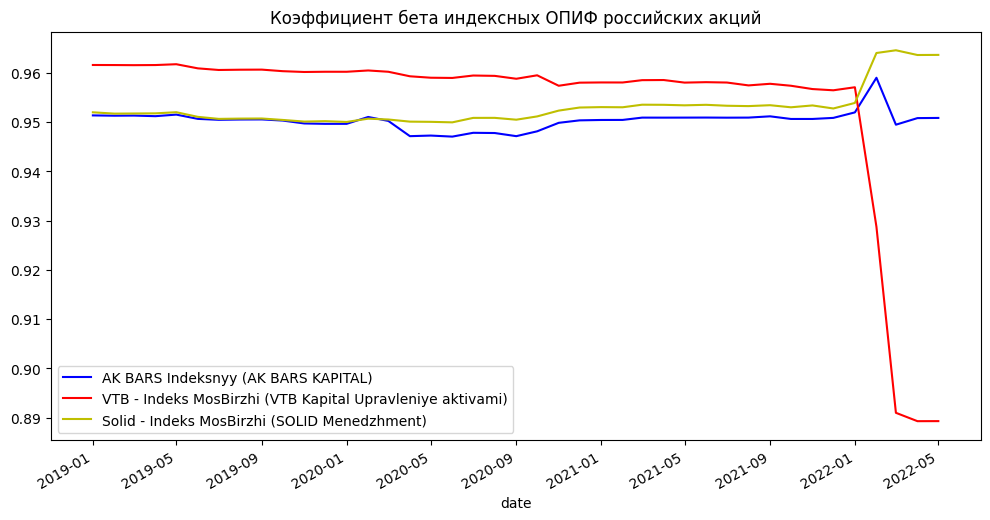

In [27]:
x.index_beta['2019-01':].plot(color=['b', 'r', 'y'], x_compat=True)
plt.legend(lg1[1:])
plt.title('Коэффициент бета индексных ОПИФ российских акций');

In [28]:
x.describe(tickers=False)

,property,period,MOEX Total Return,AK BARS Indeksnyy (AK BARS KAPITAL),VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami),Solid - Indeks MosBirzhi (SOLID Menedzhment)
0,Compound return,YTD,-0.351696,-0.283782,-0.367374,-0.336566
1,CAGR,1 years,-0.315419,-0.267087,-0.345001,-0.329298
2,CAGR,5 years,0.118107,0.112151,0.104354,0.0974252
3,CAGR,10 years,0.122925,0.104328,0.104233,0.100644
4,CAGR,"17 years, 0 months",0.128257,0.108671,0.110262,0.112383
5,Dividend yield,LTM,0,0,0,0
6,Risk,"17 years, 0 months",0.291547,0.294238,0.312918,0.288502
7,CVAR,"17 years, 0 months",0.665283,0.674573,0.674561,0.675775
8,Max drawdowns,"17 years, 0 months",-0.679146,-0.690911,-0.693853,-0.689172
9,Max drawdowns dates,"17 years, 0 months",2008-11,2008-11,2008-11,2008-11


In [27]:
x.describe(tickers=False).to_csv('opif2021.csv')

## Сравнение БПИФ и ETF

In [45]:
y = ok.AssetList(etf_full, ccy='RUB', inflation=False)
y

assets           [MCFTR.INDX, SBMX.MOEX, VTBX.MOEX, TMOS.MOEX]
currency                                                   RUB
first_date                                             2020-09
last_date                                              2022-05
period_length                                1 years, 9 months
inflation                                                 None
dtype: object

In [34]:
y.tickers

['MCFTR', 'SBMX', 'VTBX', 'TMOS']

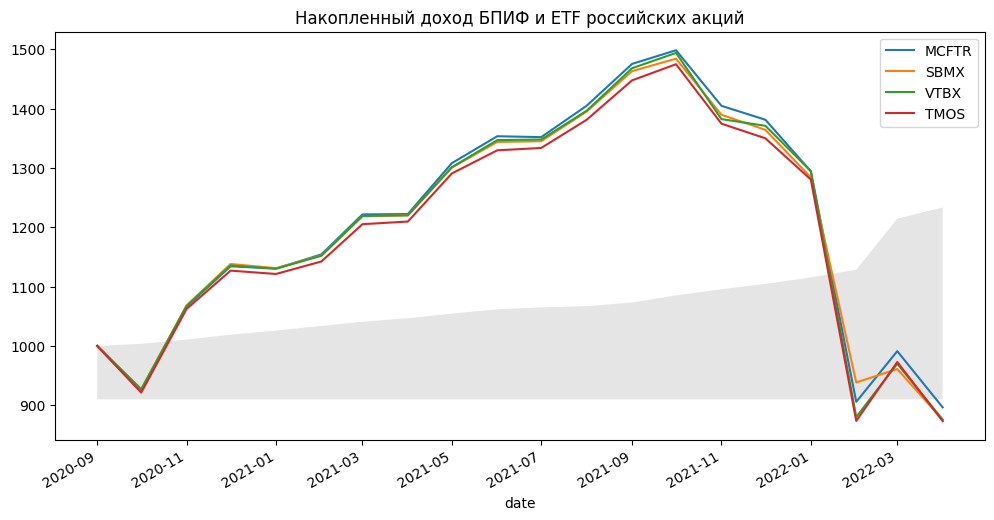

In [35]:
y.wealth_indexes.iloc[:, :-1].plot(x_compat=True)
plt.fill_between(y.wealth_indexes.index.to_timestamp(), 910, y.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(y.tickers)
plt.title('Накопленный доход БПИФ и ETF российских акций');

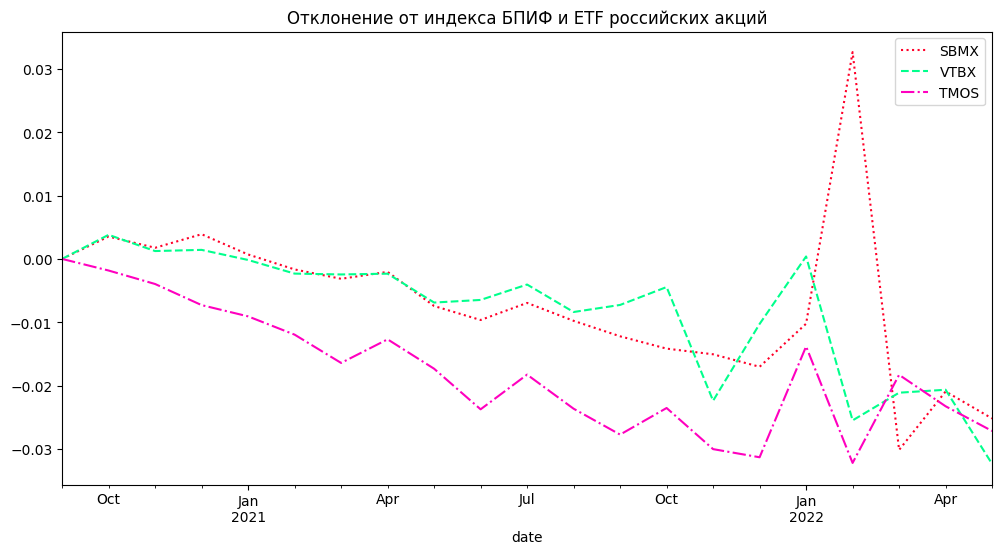

In [46]:
y.tracking_difference.plot(style=[':', '--', '-.', '-'], colormap="gist_rainbow")
plt.legend(y.tickers[1:])
plt.title('Отклонение от индекса БПИФ и ETF российских акций');

In [47]:
df = y.tracking_difference

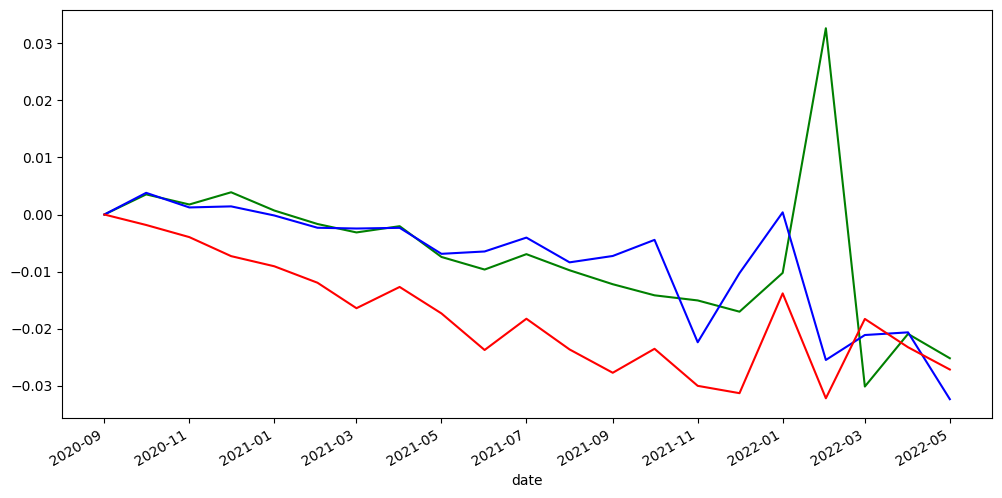

In [48]:
import pandas as pd
with pd.plotting.plot_params.use("x_compat", True):
#     df["FXRL.MOEX"].plot(color="r")
    df["SBMX.MOEX"].plot(color="g")
    df["VTBX.MOEX"].plot(color="b")
    df["TMOS.MOEX"].plot(color="r")

In [49]:
y.tracking_difference.iloc[-1, :]

SBMX.MOEX   -0.025193
VTBX.MOEX   -0.032368
TMOS.MOEX   -0.027168
Name: 2022-05, dtype: float64

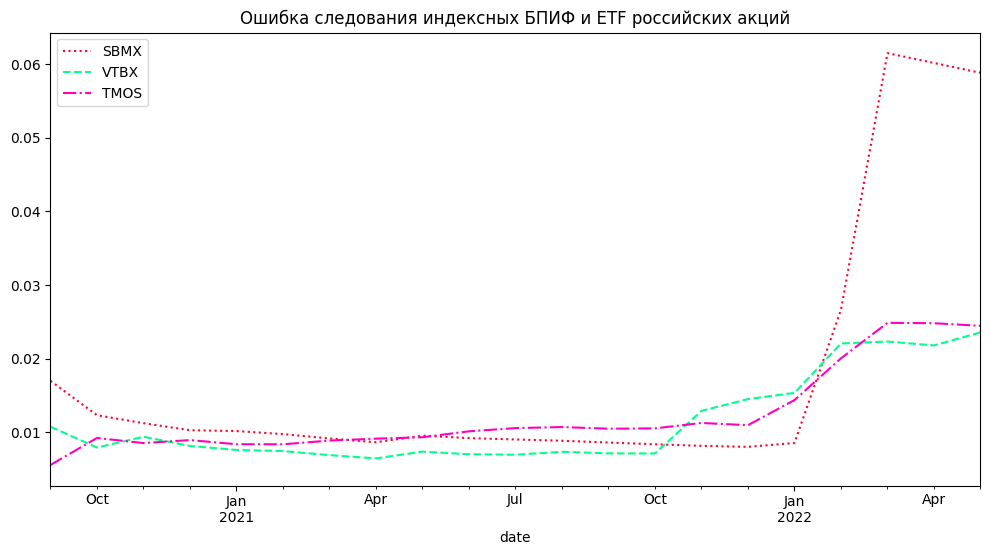

In [50]:
y.tracking_error.plot(style=[':', '--', '-.', '-'], colormap="gist_rainbow")
plt.legend(y.tickers[1:])
plt.title('Ошибка следования индексных БПИФ и ETF российских акций');

In [51]:
y.tracking_error.iloc[-1, :]

SBMX.MOEX    0.058844
VTBX.MOEX    0.023551
TMOS.MOEX    0.024448
Name: 2022-05, dtype: float64

In [52]:
y.index_beta

,SBMX.MOEX,VTBX.MOEX,TMOS.MOEX
date,,,
2021-09,1.017021,1.023436,1.014508
2021-10,1.016648,1.024282,1.015997
2021-11,1.012270,0.990449,1.003235
2021-12,1.011010,0.997230,1.003278
2022-01,1.017501,1.009164,1.021439
2022-02,1.074834,0.962161,0.971718
2022-03,1.087357,0.959259,0.959887
2022-04,1.088145,0.960979,0.958680
2022-05,1.088078,0.960124,0.958607


In [53]:
y.describe()

,property,period,MCFTR.INDX,SBMX.MOEX,VTBX.MOEX,TMOS.MOEX
0,Compound return,YTD,-0.351696,-0.362069,-0.370449,-0.356781
1,CAGR,1 years,-0.315419,-0.330875,-0.336671,-0.327273
2,CAGR,5 years,NaN,NaN,NaN,NaN
3,CAGR,10 years,NaN,NaN,NaN,NaN
4,CAGR,"1 years, 9 months",-0.0611293,-0.0763149,-0.0806742,-0.0775133
5,Dividend yield,LTM,0,0,0,0
6,Risk,"1 years, 9 months",0.316203,0.278167,0.324589,0.326044
7,CVAR,"1 years, 9 months",0.315419,0.330875,0.336671,0.327273
8,Max drawdowns,"1 years, 9 months",-0.402365,-0.413636,-0.422253,-0.411248
9,Max drawdowns dates,"1 years, 9 months",2022-05,2022-05,2022-05,2022-05


## SBMX VS FXRL (Сбер против FINEX)

In [107]:
z = ok.AssetList(['MCFTR.INDX', 'SBMX.MOEX', 'FXRL.MOEX'], ccy='RUB', inflation=False)
z

symbols          [MCFTR.INDX, SBMX.MOEX, FXRL.MOEX]
currency                                        RUB
first date                                  2018-10
last_date                                   2021-09
period length                     3 years, 0 months
inflation                                      None
dtype: object

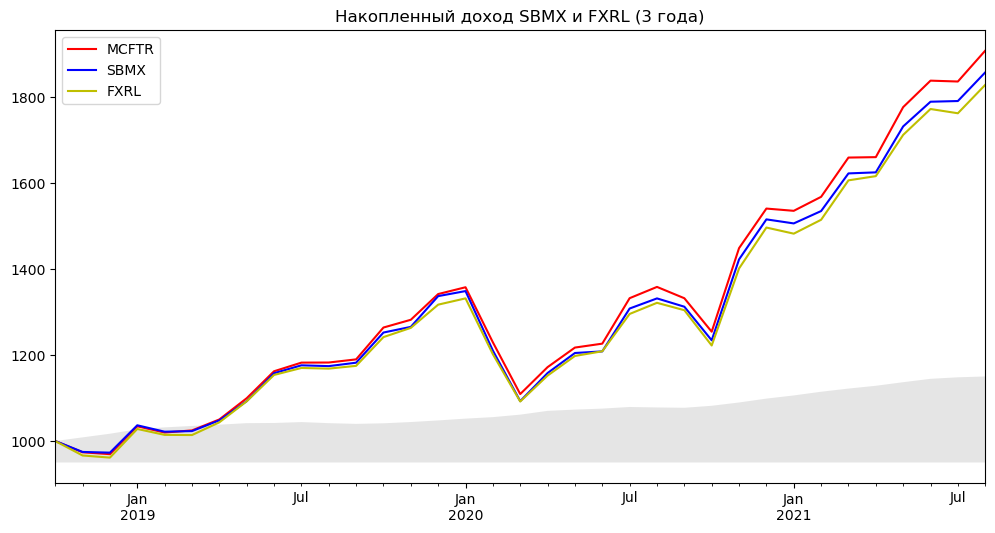

In [106]:
z.wealth_indexes.iloc[:, :-1].plot(color=['r', 'b', 'y']);
plt.fill_between(z.wealth_indexes.index.to_timestamp(), 950, z.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(z.tickers)
plt.title('Накопленный доход SBMX и FXRL (3 года)');

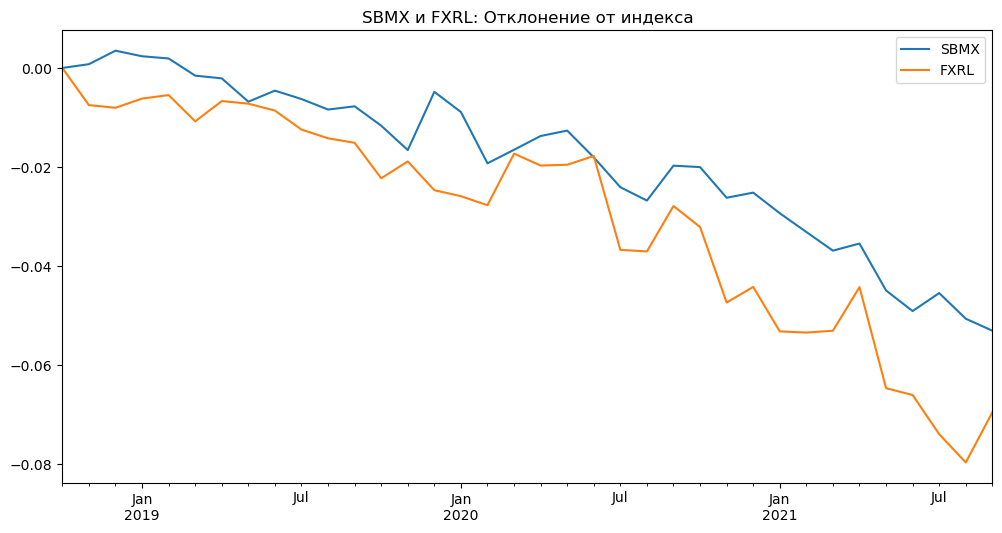

In [115]:
z.tracking_difference.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: Отклонение от индекса');

In [116]:
z.tracking_difference.iloc[-1]

SBMX.MOEX   -0.053050
FXRL.MOEX   -0.069528
Name: 2021-09, dtype: float64

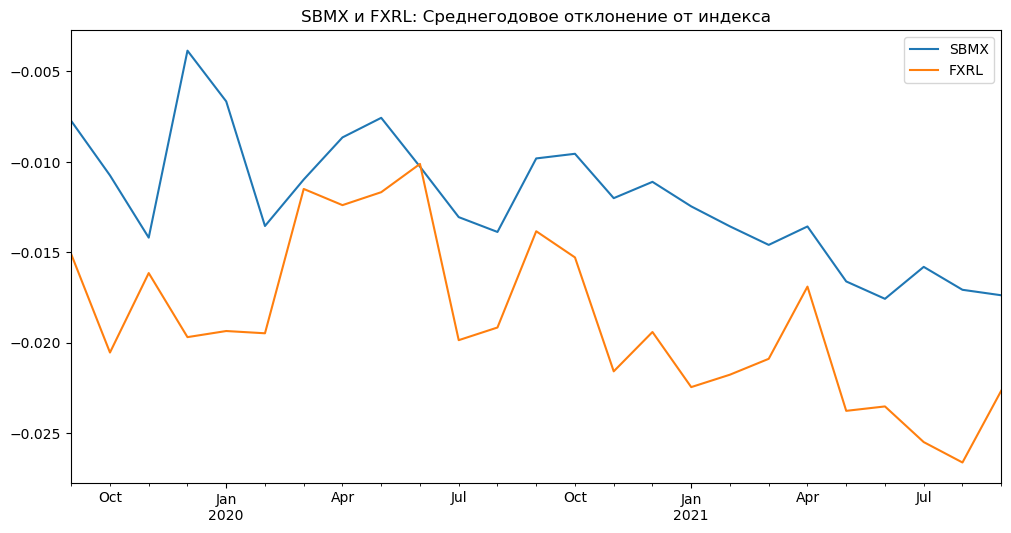

In [117]:
z.tracking_difference_annualized.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: Среднегодовое отклонение от индекса');

In [118]:
z.tracking_difference_annualized.iloc[-1]

SBMX.MOEX   -0.017380
FXRL.MOEX   -0.022659
Name: 2021-09, dtype: float64

In [127]:
z1 = ok.AssetList(['MCFTR.INDX', 'FXRL.MOEX'], ccy='RUB')
z1

symbols          [MCFTR.INDX, FXRL.MOEX]
currency                             RUB
first date                       2016-04
last_date                        2021-08
period length          5 years, 5 months
inflation                       RUB.INFL
dtype: object

In [128]:
z1.tracking_difference_annualized.iloc[-1]

FXRL.MOEX   -0.035013
Name: 2021-08, dtype: float64

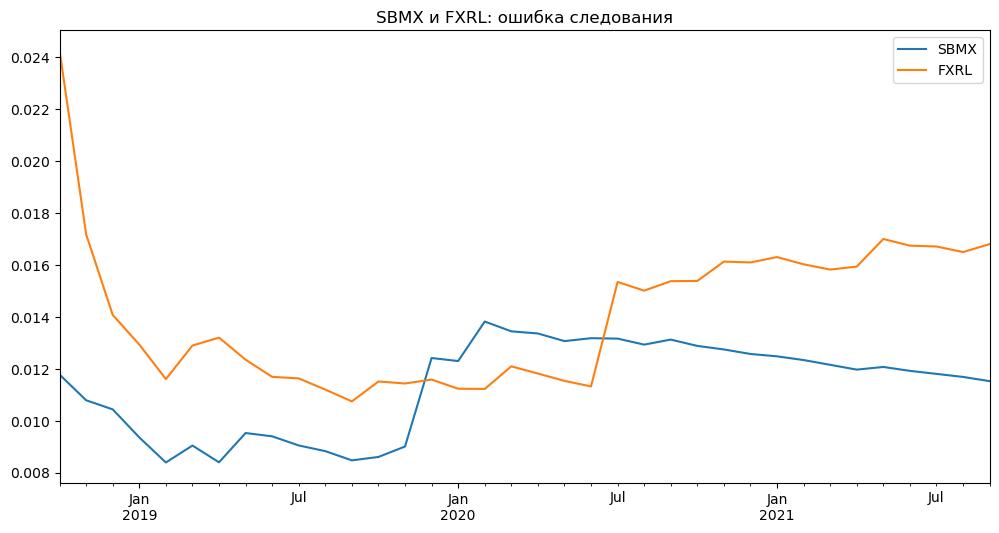

In [120]:
z.tracking_error.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: ошибка следования');

In [121]:
z.tracking_error.iloc[-1]

SBMX.MOEX    0.011526
FXRL.MOEX    0.016802
Name: 2021-09, dtype: float64

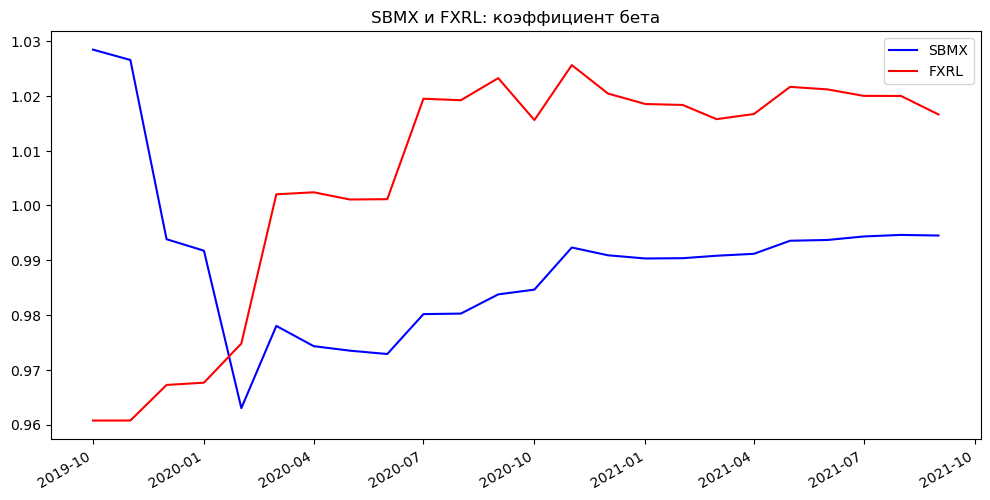

In [124]:
z.index_beta.plot(color=['b', 'r', 'y'], x_compat=True)
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: коэффициент бета');